![Housing In India](https://github.com/mobadara/housing-in-india/blob/main/assets/images/houses.jpeg?raw=1)

# 🏠 **Housing Prices in India: Exploratory Data Analysis**


[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mobadara/housing-in-india/blob/main/notebooks/exploratory-data-analysis.ipynb)


## 🧭 **Project Overview**

India’s housing market is diverse and dynamic, shaped by rapid urbanization, regional disparities, and evolving economic factors. Understanding property price variations across different regions requires more than just statistical summaries — it calls for an analytical deep dive into **location, infrastructure, and socioeconomic variables**.

This notebook focuses on performing an **Exploratory Data Analysis (EDA)** to understand the structure and relationships within the dataset before any cleaning or modeling is performed.  
Insights gained from this analysis will directly guide **data cleaning, transformation, and feature engineering** in the next phase.

---

## 🗂️ **Notebook Outline**
0. Setup
1. Dataset Inspection
2. Summary Statistics
3. Distribution Analysis  
4. Feature Relationships  
5. Outlier Detection
7. Cleaning & Transformation Recommendations  

---


> 💡 **Note:** This notebook focuses purely on analysis.  
> All cleaning, preprocessing, and modeling steps will be implemented in subsequent notebooks for reproducibility and clarity.

---

## **Setup**
In this phase, I use imported the required python packages (local and those installed using `pip`), downloaded the dataset using `kagglehub` package and put the dataset in the right format. The downloaded dataset contains three `csv` files: `train.csv`, `test.csv` and `sample_submission.csv`. **Sample Submission** is a **one-column** dataset, column being the predicted **house price** from the **test dataset** (`test.csv`). The test dataset does not contain the target (price in lacs).

The version of the packages used are also printed for reproducibility and reporting purposes.

In [1]:
# Import necessary packages
import kagglehub
import os
import sys
import pandas as pd

In [2]:
# Download Dataset
# Download latest version
# try:
#     path = kagglehub.dataset_download("anmolkumar/house-price-prediction-challenge")
# except Exception as e:
#     print(f"Error downloading dataset: {e}")
#     print("Use the available dataset in the data folder.")

In [3]:
# Set up Environment
MODULE_PATH = os.path.abspath(os.path.join("..", "src"))
if not os.path.exists("../data"):
    os.makedirs('../data')
if MODULE_PATH not in sys.path:
    sys.path.insert(0, MODULE_PATH)
!cp -r {path}/* ../data/
!rm -r {path}
print(f'Dataset downloaded to ../data/')
print(f'Files in ../data/: {os.listdir("../data/")}')

cp: cannot stat '{path}/*': No such file or directory
rm: cannot remove '{path}': No such file or directory
Dataset downloaded to ../data/
Files in ../data/: ['sample_submission.csv', 'train.csv', 'test.csv']


In [4]:
# Import personal packages
from analysis.univariate import Univariate
from analysis.bivariate import Bivariate
from analysis.inspection import Inspector
from analysis.multivariate import Multivariate

## **Dataset Inspection**

In [5]:
df_train = pd.read_csv("../data/train.csv");

In [6]:
inspector = Inspector(data=df_train)
inspector.inspect()

Dataset Shape: (29451, 12)

Data Types:
------------------------------


POSTED_BY                 object
UNDER_CONSTRUCTION         int64
RERA                       int64
BHK_NO.                    int64
BHK_OR_RK                 object
SQUARE_FT                float64
READY_TO_MOVE              int64
RESALE                     int64
ADDRESS                   object
LONGITUDE                float64
LATITUDE                 float64
TARGET(PRICE_IN_LACS)    float64
dtype: object


Basic Information:
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


None

- The train dataset contains **29,451** instances with **12** fratures recorded for each instance.
- There are three features of the `object` type which are `categorical` in the case of a pandas dataframe. These columns are `POSTED_BY`, `BHK_OR_RK` and `ADDRESS`.
- The data contains four `float` features: The area covered by the house recorded as `SQUARE_FT`, latitude, longitude, (recorded as `LATITUDE`, `LONGITUDE` respectively) and the target feature **price** recorded as `TARGET(PRICE_IN_LACS)`.
- The dataset contains five `int` features: `UNDER_CONSTRUCTION`, `RERA`, `BHK_NO`, `BHK_OR_RK`, `READY_TO_MOVE` and `RESALE`. Integers are whole numbers but often, datatypes recorded as integers store binary (0, 1) values. In other cases, it contains ordinal data, the cases will be processed accordingly.

### **Actions to be taken:**
- The inconsistencies in the column names will be handled in the **data cleaning** phase of the project. For instance, the target column will be remaned to `price` and all column names set to lower case and renamed to their respective meaning.
- Take note of the columns (`int`) that stored binary values.
- Take note for the object columns, and think about insights to extract from them and the right tools to use. 

In [7]:
inspector.missing_values();


No missing values found.


- The dataset contains **0** missing values.

In [8]:
inspector.duplicates();


Number of duplicate rows: 401


The dataset contains **401** duplicate rows. These will be handled in the data cleaning phase of the project.

## **Summary Statistics**

In [9]:
inspector.statistics();


Summary Statistics: (including categorical data)
------------------------------


,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29451,29451.000000,29451.000000,29451.000000,29451,2.945100e+04,29451.000000,29451.000000,29451,29451.000000,29451.000000,29451.000000
unique,3,NaN,NaN,NaN,2,NaN,NaN,NaN,6899,NaN,NaN,NaN
top,Dealer,NaN,NaN,NaN,BHK,NaN,NaN,NaN,"Zirakpur,Chandigarh",NaN,NaN,NaN
freq,18291,NaN,NaN,NaN,29427,NaN,NaN,NaN,509,NaN,NaN,NaN
mean,NaN,0.179756,0.317918,2.392279,NaN,1.980217e+04,0.820244,0.929578,NaN,21.300255,76.837695,142.898746
std,NaN,0.383991,0.465675,0.879091,NaN,1.901335e+06,0.383991,0.255861,NaN,6.205306,10.557747,656.880713
min,NaN,0.000000,0.000000,1.000000,NaN,3.000000e+00,0.000000,0.000000,NaN,-37.713008,-121.761248,0.250000
25%,NaN,0.000000,0.000000,2.000000,NaN,9.000211e+02,1.000000,1.000000,NaN,18.452663,73.798100,38.000000
50%,NaN,0.000000,0.000000,2.000000,NaN,1.175057e+03,1.000000,1.000000,NaN,20.750000,77.324137,62.000000
75%,NaN,0.000000,1.000000,3.000000,NaN,1.550688e+03,1.000000,1.000000,NaN,26.900926,77.828740,100.000000



Unique Values per Categorical Column:
------------------------------

Column: POSTED_BY (Unique Values: 3)
------------------------------


array(['Owner', 'Dealer', 'Builder'], dtype=object)


Column: UNDER_CONSTRUCTION (Unique Values: 2)
------------------------------


array([0, 1])


Column: RERA (Unique Values: 2)
------------------------------


array([0, 1])

There are more than 10 unique values.

Column: BHK_OR_RK (Unique Values: 2)
------------------------------


array(['BHK', 'RK'], dtype=object)


Column: READY_TO_MOVE (Unique Values: 2)
------------------------------


array([1, 0])


Column: RESALE (Unique Values: 2)
------------------------------


array([1, 0])

There are more than 10 unique values.


- All features contains the same number of instances (**29,451**). This is possible because the dataset contains no missing values, as seen in the inspection in the section above.

- `POSTED_BY` has three unique values: **Owner**, **Dealer**, **Builder**, with **Dealer** being the most occuring value (mode). This is reasonable as dealers are professionals at marketing real-estate products. Out of the **29,451** houses, **18,291** are posted by the dealer.

- `UNDER_CONSTRUCTION` has two unique values (0, 1), meaning this is a binary colum  indicating if the house is **under construction** or **not**. This feature is an `integer` feature with a mean of **0.179756** with a standard deviation of **0.383991**. The value of the mean is closer to 0 which suggests that most houses are **not under construction** (more **0** values for this feature). This is also confirmed by the first, second, and third quartile which are all zeros. The data ranges between 0 and 1, and with a standard deviation of **0.383991**, a three-standard deviation ($3 \times 0.383991 = 1.153$) which is only a bit above the maximum value in the feature distribution.

- `RERA` (Real Estate Regulation and Development) is a binary feature that indicates whether the house is RERA approved or not. `RERA` has a mean of **0.317918** also indicating that more houses are not approved (mean $\lt 0.5$). A standard deviation of **0.465675** also indicates that there is a moderate spread between the two values of 0's and 1's. This is expected, because the mean is more closer the the middle than it is in `UNDER_CONSTRUCTION` feature. As confirmed from the quartiles, the third quartile is 1 while the first and second quartile have 0 value. This also confirms the higher value of the standard deviation.

- `BHK_NO.` (Number of rooms [Bedroom, Hall, or Kitchen]) has a minimum value of 1 and a maximum value of 20. In the real-estate industry, we can have houses with 20 rooms and a house with only one room. A mean of **0.465675** and a standard deviation **0.879091** shows that most of the houses captured in the dataset contain a few number of roooms ($\lt 5$). This is evident from the first quartile, median and third quartile values which are 1, 2, and 3 respectively. This is a highly positively skewed feature. Log transfomation can be used to transform this feature.

- `BHK_OR_RK` is a binary feature that indicates whether the house contains a hall (H) or not. 0 means "no" and 1 means "yes". Out of **29,451** houses recorded, **29,427** houses have a hall in it. A very small fraction of the houses contains only a bedroom and a kitchen.

- `SQUARE_FT` records the total areas covered by the house. It has a mean of **19,802.17 square feet** and a standard deviation of **1,901,335.0 square feet**. The median is **117.5057** which is way too lower than the mean. Now, the appropriate measure of central tendency for this type of feature is the **median**. This situation suggests that there are few high values in this features which greatly affect the mean. This feature also needs to be transformed.

- `READY_TO_MOVE` is an indicator that a house has been completed and ready for posession. This is a binary feature (0 and 1). It has a mean of **0.820244** and a standard deviation of **0.383991**. The value of the mean and the standard deviation indicates that more houses are ready for posession, and this is also evident from the values of the median and third quartile that are both 1.

- `RESALE` is a feature that indicate resale or not. 1 means "yes" and 0 means "no". A mean of **0.929578** and a standard deviation of **0.25586** indicates that most of the houses were previously sold are now listed for re-sale.

- `ADDRESS` is a `text` (`object` in pandas) feature. It captures the address of each house, and most of the houses are located **Zirakpur** city which is a hub for real-estate business [Link](https://www.quora.com/Which-location-is-better-for-real-estate-investment-Zirakpur-or-Mohali-Chandigarh).

- `LATITUDE` and `LONGITUDE` are location coordinates that indicate the exact location coordinate of the houses. The range of the values are within the latitude and longitude of India [Link](https://en.wikipedia.org/wiki/Geography_of_India).

- `TARGET(PRICE_IN_LACS)` is the target feature. The mean price is **142.898746 lacs** with a standard deviation of **656.880713** which indicates a significant spread in the price. The maximum price is **30,000.0 lacs** and the minimum price is **142.898746 lacs**. A media of **62.0 lacs** indicates that much of the house prices ranges around **50 lacs - 70 lacs**. Hence, this target is skewed, and needs a transformation.

## **Distribution Analysis**
In this section, I analyzed the relationship between the target variable (price) and the other variables.
 
 The following sub sections are discussed:
 1. Univariate analysis
 2. Bivariate Analysis
 3. Multivariate Analysis

### **Univariate Analysis**

In [10]:
for col in ['UNDER_CONSTRUCTION', 'READY_TO_MOVE', 'RESALE', 'RERA', 'BHK_OR_RK']:
    df_train[col] = df_train[col].astype('category')

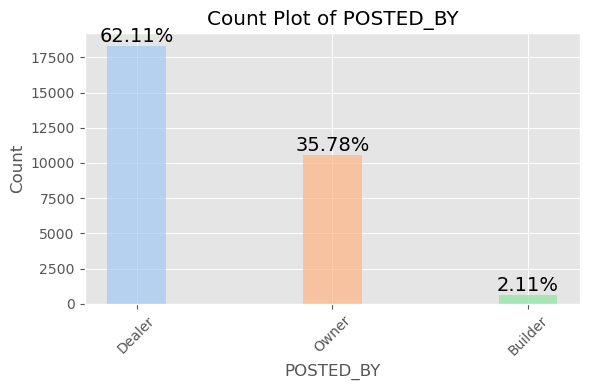

(<BarContainer object of 3 artists>,
 <analysis.univariate.Univariate at 0x774998775d30>)

In [11]:
univariate = Univariate(df_train)
univariate.categorial_analysis(column='POSTED_BY')

$62.11\%$ of the houses captured in the dataset are posted by the dealer (agents that are professional in real-estate marketing), $35.78\%$ are posted by the home ownwr and only a few percentage ($2.211\%$) are posted by the builder. 

- Our model should be able to learn the underlying factors responsible for this:
  - Are very expensive houses posted by dealers, owner or builder?
  - Are houses posted by the builders, in the construction phase?
  - If all real-estate dealers in Indian are registered, can we obtain their registeration id, and get the dealer id for each house if it was posted by a dealer? 

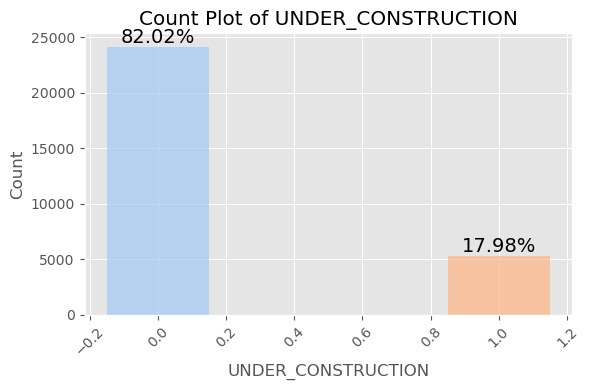

(<BarContainer object of 2 artists>,
 <analysis.univariate.Univariate at 0x774998775d30>)

In [12]:
univariate.categorial_analysis(column='UNDER_CONSTRUCTION')

**82.02%** of the houses are not under construction while the rest (**17.98%**) are. We will se in the bivariate analysis how this vary with house price, and with other variables, but we may think that `UNDER_CONSTRUCTION` and `READY_TO_MOVE` are mutually exclusive (i.e. a building cannot be under construction and be ready for posession at the same time), but in some cases and even considering the economic condition, this is possible (in the future). Hence, our model needs to learn this. 

- We may need the dates when the data was captured combined with economic data like GDP, standard of living, prices of building materials and so forth.

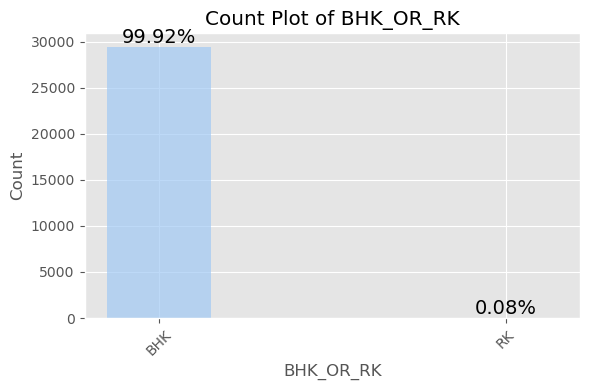

(<BarContainer object of 2 artists>,
 <analysis.univariate.Univariate at 0x774998775d30>)

In [13]:
univariate.categorial_analysis(column='BHK_OR_RK')

Almost all the houses captured have a room, a hall and a kitchen, suggesting that this is the standard in India.

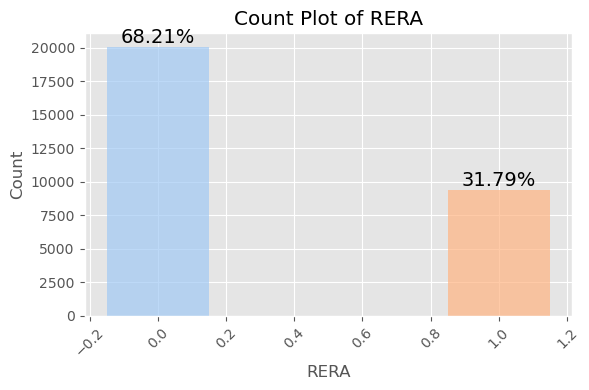

(<BarContainer object of 2 artists>,
 <analysis.univariate.Univariate at 0x774998775d30>)

In [14]:
univariate.categorial_analysis(column='RERA')

**68.21%** of the houses captured are not approved by the Real-Estate Regulatory Agency. The remaining **31.79%** that were registered. This may be due to some factors such as price, state of the building, etc. Also note that a house under construction can be approved by the RERA.

According the [Legal Raastra](https://www.legalraasta.com/rera-registration-charges/), RERA registration fees are charged according to the nature of the building and the amount of square feet covered by the building. The fee is charged per square feet. This may be a major factor hidering some houses from been approved. 

Generally, one should think that a house approved by the RERA should be more valuable and hence more expensive, but this will be seen in the bivariate analysis.

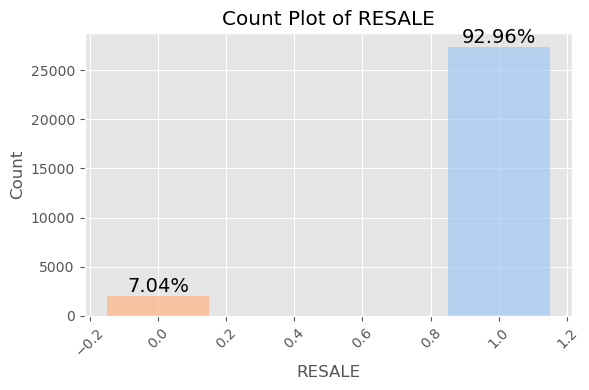

(<BarContainer object of 2 artists>,
 <analysis.univariate.Univariate at 0x774998775d30>)

In [15]:
univariate.categorial_analysis(column='RESALE')

**92.96%** of houses were sold and now marked for resale. This is common in the real-estate market. We will see if this is related to house prices in the bivariate section.

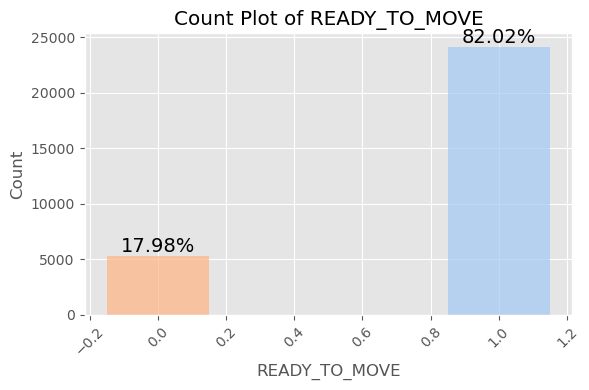

(<BarContainer object of 2 artists>,
 <analysis.univariate.Univariate at 0x774998775d30>)

In [16]:
univariate.categorial_analysis(column='READY_TO_MOVE')

**82.02%** of the houses are ready for posession. This is expected, because in real-estate, there won't be a market if the house are not marketable.

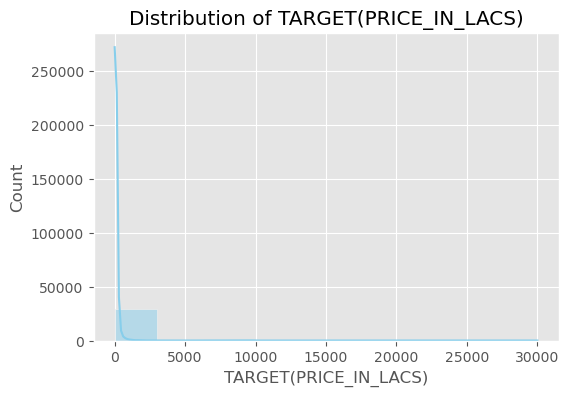

(<Axes: title={'center': 'Distribution of TARGET(PRICE_IN_LACS)'}, xlabel='TARGET(PRICE_IN_LACS)', ylabel='Count'>,
 <analysis.univariate.Univariate at 0x774998775d30>)

In [17]:
univariate.numerical_analysis(column='TARGET(PRICE_IN_LACS)')

The target (**price**) is a positively skewed distribution aith most of the house prices ranging between - to about 3000 lacs. The very high value of **30,000 lacs** suggests that this is an outlier.

A real-estate expert in India might know that a house whose price is **30,000** lack is not neccessaryly a result of error but might be that the house is a big mansion with many rooms in it. Imagine the house with 20 numbers of rooms which covers a large area in (SQUARE_FT).

**Actions**: Use Log Transformation to bring the high values closer to the lower ones so that normal distribution is assumed.

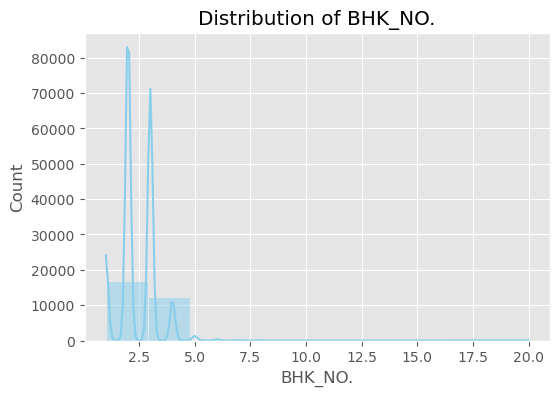

(<Axes: title={'center': 'Distribution of BHK_NO.'}, xlabel='BHK_NO.', ylabel='Count'>,
 <analysis.univariate.Univariate at 0x774998775d30>)

In [18]:
univariate.numerical_analysis(column='BHK_NO.')

`BHK_NO.` (Number of rooms) is also positively skewed, with most of the values is between 0 and 5. There visualization indicates that there are houses with up to 20 numbers of rooms.

In the real-estate industry, this is allowed, there are houses with more than 20 numbers of rooms.

**Actions to be taken**: Use Log transformation to scale the distribution to normal distribution.

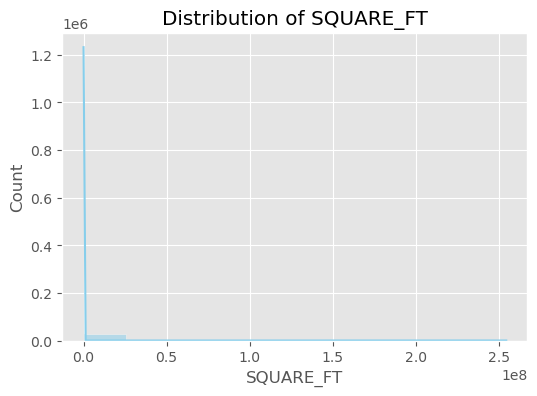

(<Axes: title={'center': 'Distribution of SQUARE_FT'}, xlabel='SQUARE_FT', ylabel='Count'>,
 <analysis.univariate.Univariate at 0x774998775d30>)

In [19]:
univariate.numerical_analysis(column='SQUARE_FT')

`SQUARE_FT` is a measure of the area covered by the house. For the distribution shown, the area ranges from the minimum up to **250,000,000 square feet**.

**Actions**: Use log transformation to transform the feature.

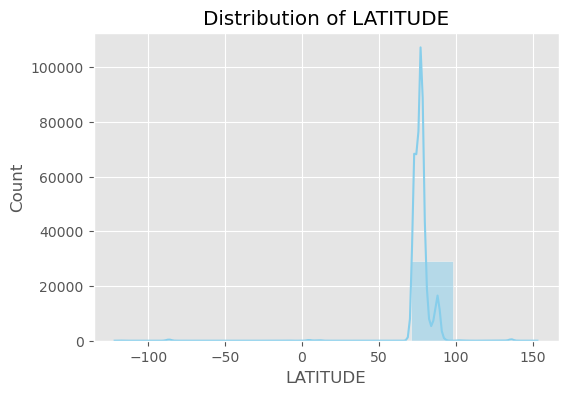

(<Axes: title={'center': 'Distribution of LATITUDE'}, xlabel='LATITUDE', ylabel='Count'>,
 <analysis.univariate.Univariate at 0x774998775d30>)

In [20]:
univariate.numerical_analysis(column='LATITUDE')

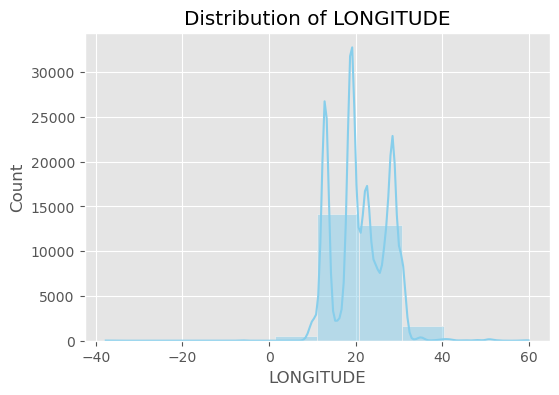

(<Axes: title={'center': 'Distribution of LONGITUDE'}, xlabel='LONGITUDE', ylabel='Count'>,
 <analysis.univariate.Univariate at 0x774998775d30>)

In [21]:
univariate.numerical_analysis(column='LONGITUDE')

The **latitude** and **longitude** contains negative values. Most of the values are clustered around specific ranges and few values extendding in both directions. We need to transform the data to the positive range and use Standard Scaler for the transformation.

### **Bivariate Analysis**

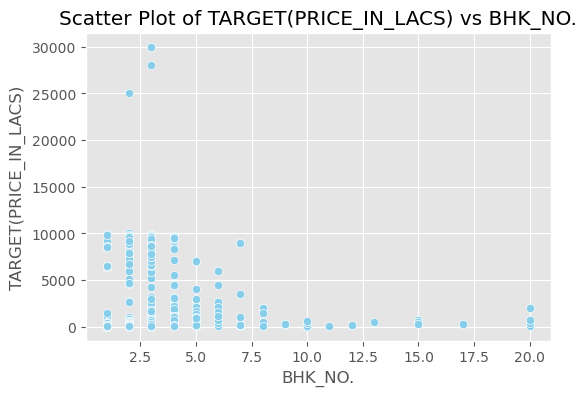

In [22]:
bivariate = Bivariate(df_train)
bivariate.numerical_analysis('BHK_NO.')

Intrestingly, I thought a house with 20 rooms will be the one with a price of 30,000 lacs, but now. Is this a problem? Maybe the the 30,000 is really an outlier?

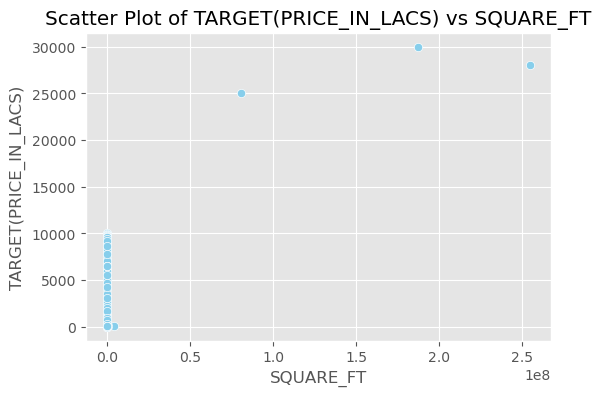

In [23]:
bivariate.numerical_analysis('SQUARE_FT')

Now, I see. The house with a price of 30,000 lacs covers about 180,000,000 square feet. The smaller number of rooms now suggests that the rooms must be very large in size. 

An action to be taken in this case is to calculate the price of houses per unit area. In this case, we can drop the price and area (square ft).

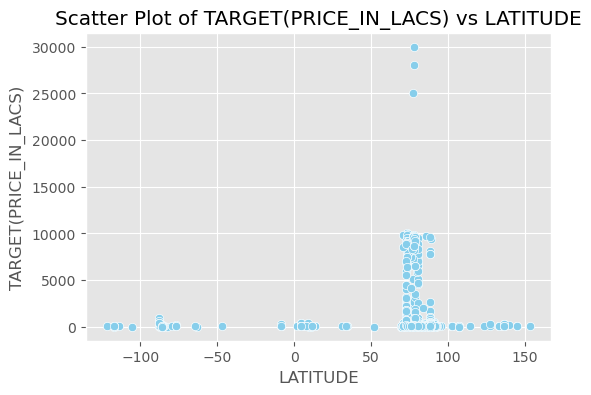

In [24]:
bivariate.numerical_analysis('LATITUDE')

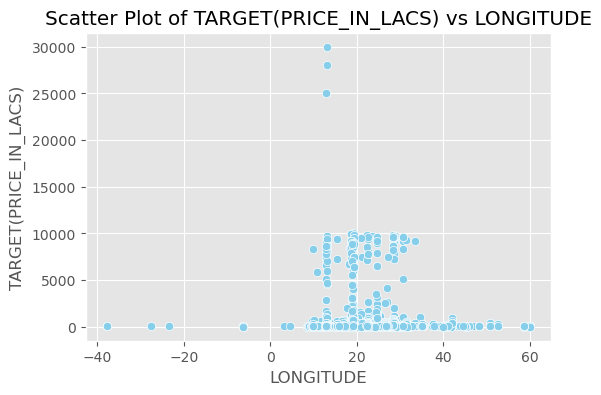

In [25]:
bivariate.numerical_analysis('LONGITUDE')

The longitude has a larger spread than the latitude. Though, the houses are concentrated in a partucular area, there is no visible linear relationship between price and latitude or price and longitude.

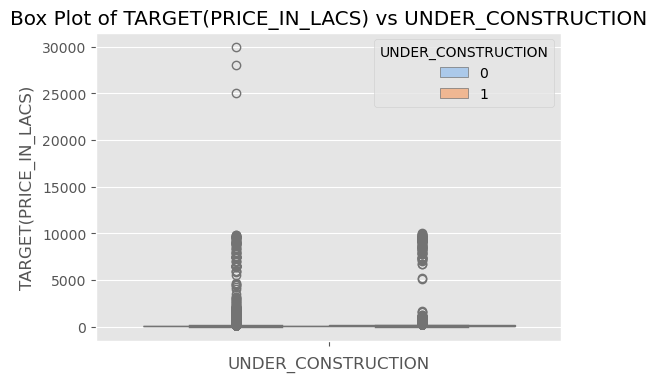

In [26]:
bivariate.categorial_analysis('UNDER_CONSTRUCTION')

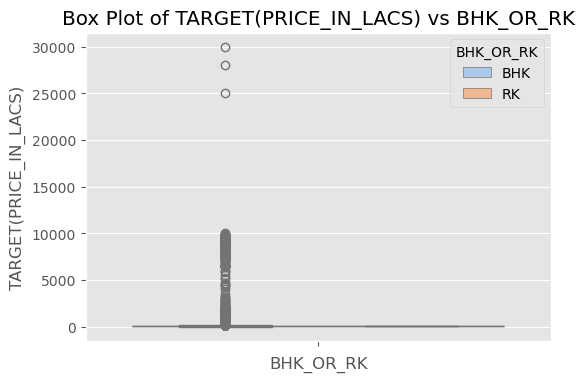

In [27]:
bivariate.categorial_analysis('BHK_OR_RK')

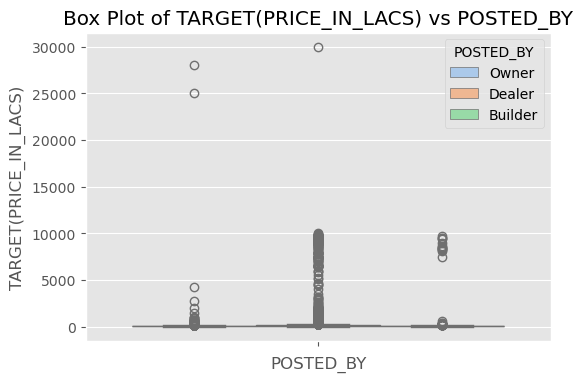

In [28]:
bivariate.categorial_analysis('POSTED_BY')

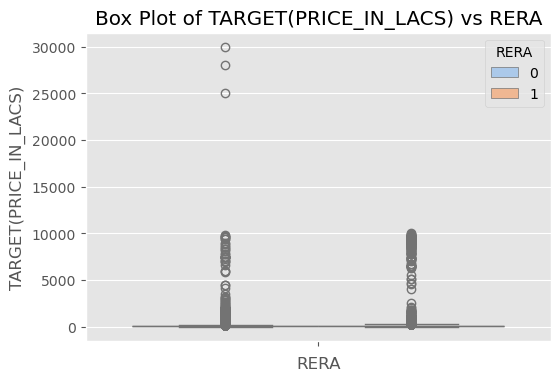

In [29]:
bivariate.categorial_analysis('RERA')

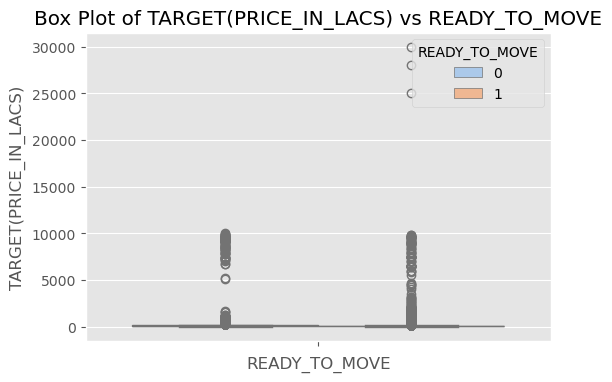

In [30]:
bivariate.categorial_analysis('READY_TO_MOVE')

For the categorical relationship, the mean values do not show visible relationships with house pricesl.

### **Multivariate Analysis**
In this section, we will check relationships among the features.

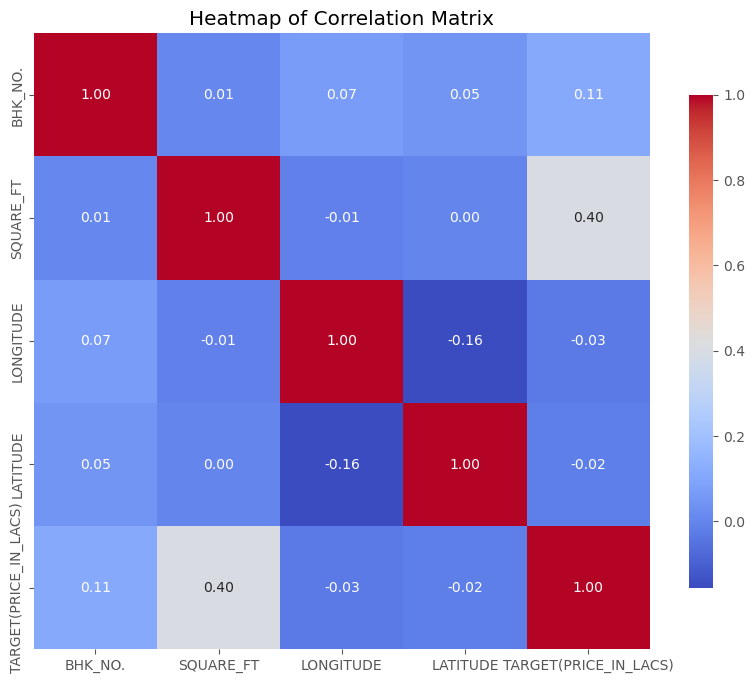

In [31]:
multivariate = Multivariate(df_train)
multivariate.heatmap_analysis()

<Figure size 1000x800 with 0 Axes>

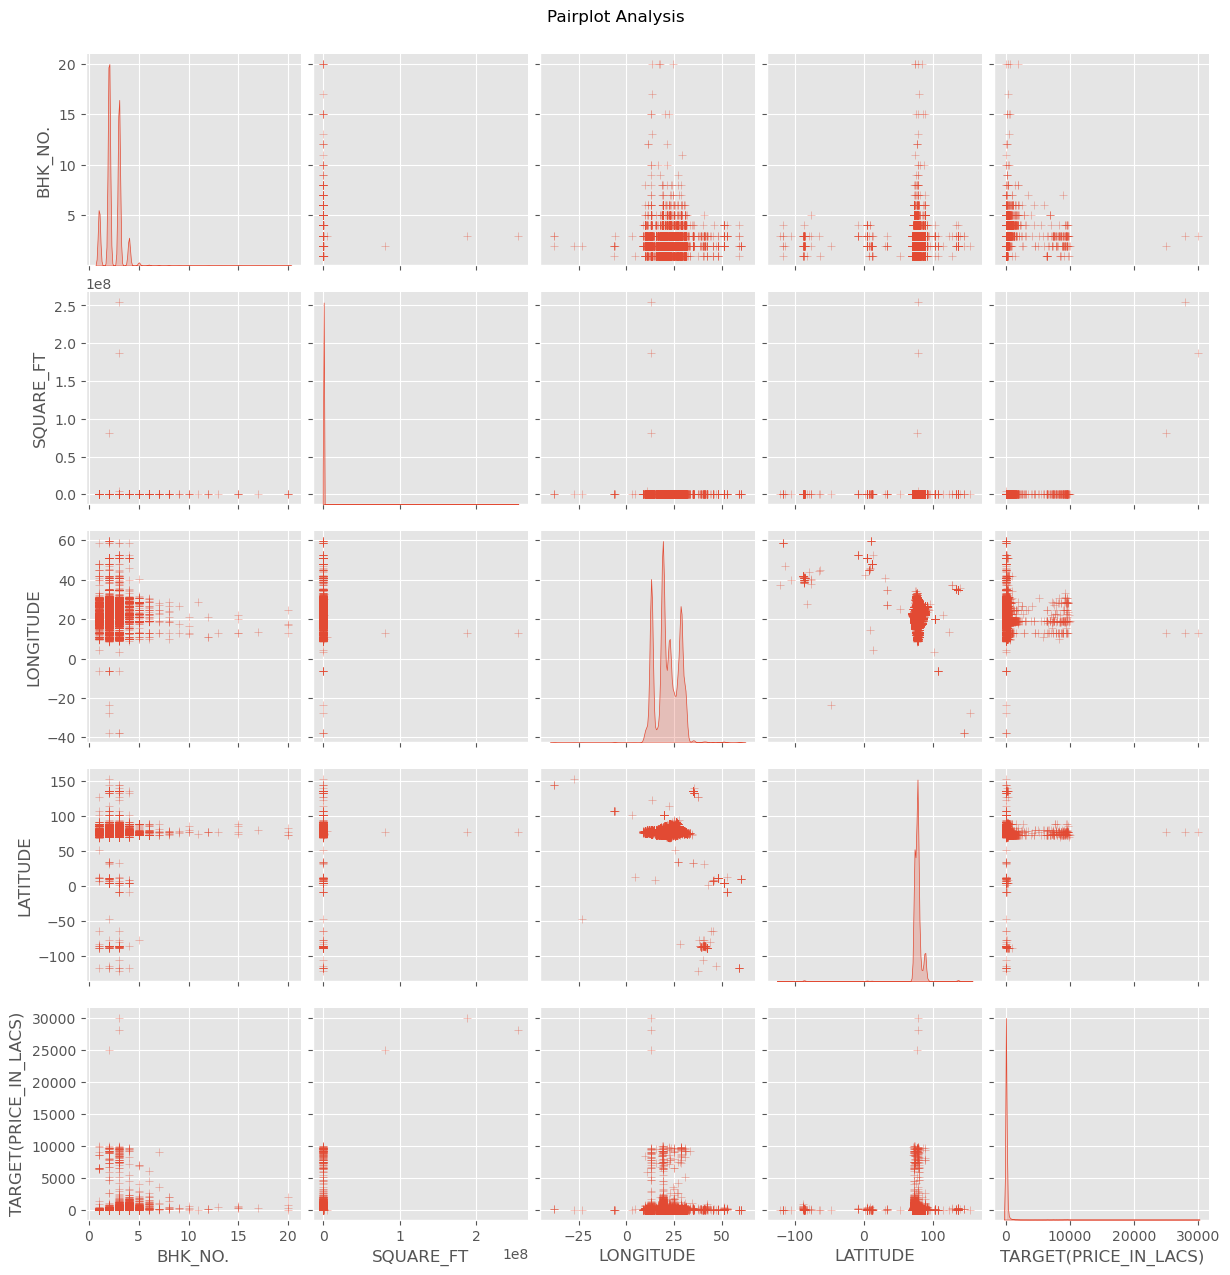

In [32]:
multivariate.pairplot_analysis()

For all the numerica features, no one is correlated with the target (price), the challenge here is that creating more features from the features recorded may result in a feature that correlates with the target.

- There is no multicolinearity.
- There are no high cardinality features
- We need to pay attention to area (square ft), and number of rooms.

- We need to employ another package to extract district, city and state from the address and (lat/lon) features.